# Parte 1: MLP con imágenes

•Implemente en Keras un MLP con la cantidad de capas y neuronas que prefiera, que permita hacer clasificación de imágenes.

•Entrene la red en CIFAR10 y reporte valores relevantes: velocidad por época, pérdida entrenamiento, pérdida validación, etc.

•Juegue con los hiperparámetros y estructura de la red hasta obtener el rendimiento más alta en el set de validación/test.

In [ ]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models


### Carga del dataset CIFAR-10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

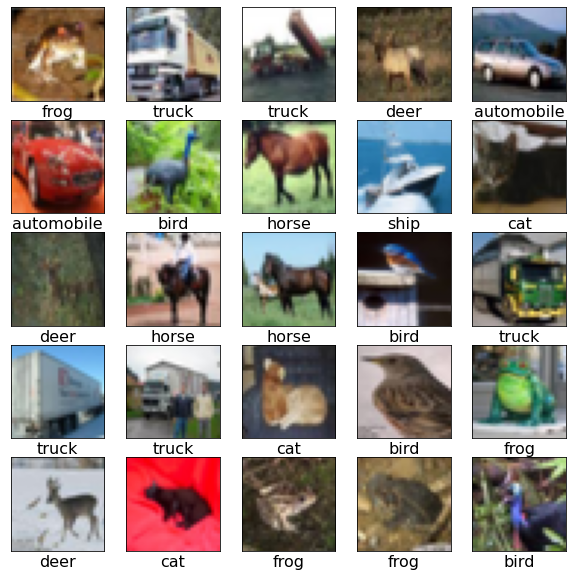

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Construcción del modelo MLP

In [ ]:
input_shape = (32 ,32, 3) # Imagenes de 32 x 32 con 3 canales

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape= input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_51 (Dense)            (None, 256)               786688    
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del Modelo

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

from_logits = TRUE --> Internamente usa softmax

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 5s 12ms/step - loss: 1.9060 - accuracy: 0.3083 - val_loss: 1.7779 - val_accuracy: 0.3646
Epoch 2/50
352/352 [==============================] - 4s 12ms/step - loss: 1.7082 - accuracy: 0.3856 - val_loss: 1.7052 - val_accuracy: 0.3916
Epoch 3/50
352/352 [==============================] - 4s 12ms/step - loss: 1.6323 - accuracy: 0.4170 - val_loss: 1.6049 - val_accuracy: 0.4362
Epoch 4/50
352/352 [==============================] - 4s 12ms/step - loss: 1.5651 - accuracy: 0.4407 - val_loss: 1.5771 - val_accuracy: 0.4462
Epoch 5/50
352/352 [==============================] - 4s 12ms/step - loss: 1.5211 - accuracy: 0.4547 - val_loss: 1.5554 - val_accuracy: 0.4488
Epoch 6/50
352/352 [==============================] - 4s 12ms/step - loss: 1.4944 - accuracy: 0.4656 - val_loss: 1.5420 - val_accuracy: 0.4536
Epoch 7/50
352/352 [==============================] - 4s 13ms/step - loss: 1.4606 - accuracy: 0.4804 - val_loss: 1.4898 - val_accuracy: 0.4704

### Evaluación

In [ ]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print("Loss en conjunto de test:",round(score[0],3))
print("Accuracy en conjunto de test:", round(score[1],3))

Loss en conjunto de test: 1.59
Accuracy en conjunto de test: 0.493


### Rporte de valores relevantes y gráficos

**Accuracy**

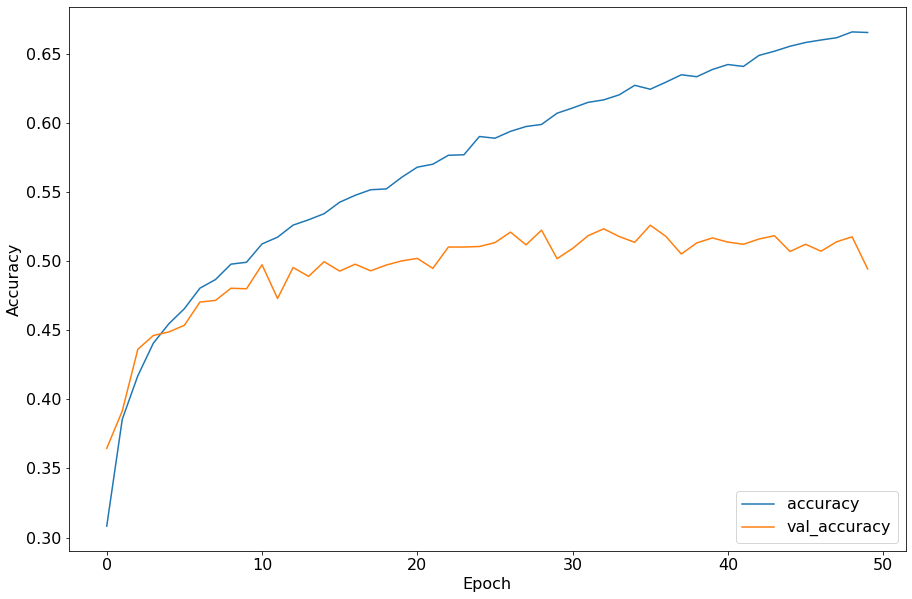

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

**Loss**

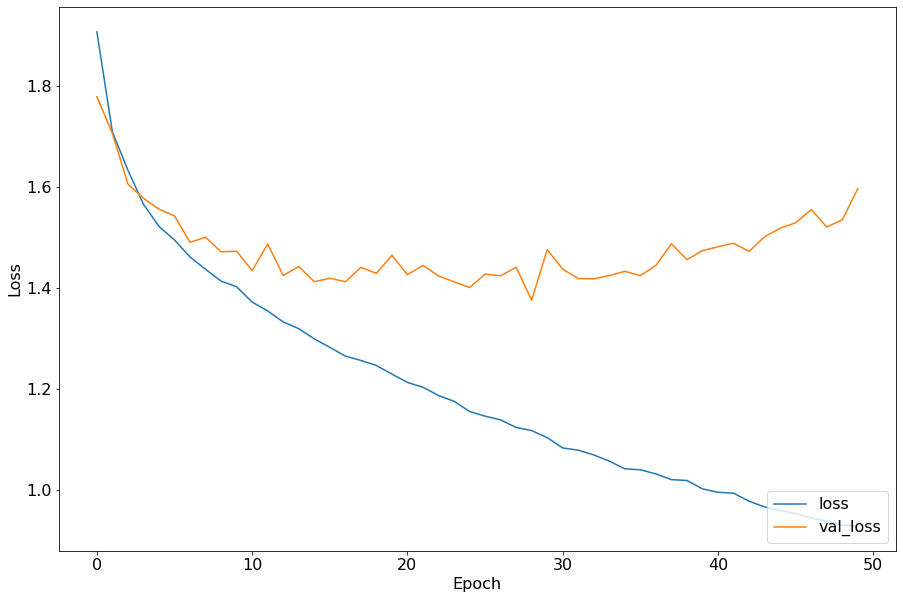

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# Parte 2: autoencoder

Un autoencoder es una arquitectura de red neuronal que se utiliza para aprender features generativas, es decir, que permitan generar datos.
En particular, un autoencoder utiliza un estructura de cuello de botella para generar un output que sea lo más parecido posible al input.

•Utilizando Keras, construya y entrene autoencoders para alguno de los sets de datos disponibles.

•Haga un análisis de sensibilidad para el código (code en la figura), graficando su tamaño vs la pérdida de reconstrucción promedio. Compare estos valores para los sets de entrenamiento y validación/test.


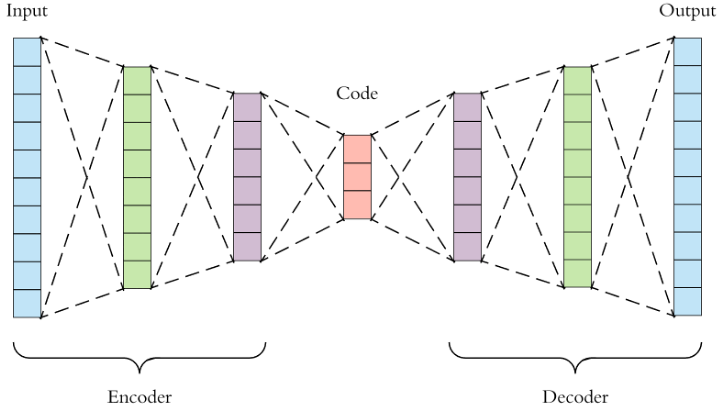

### Carga de datos

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

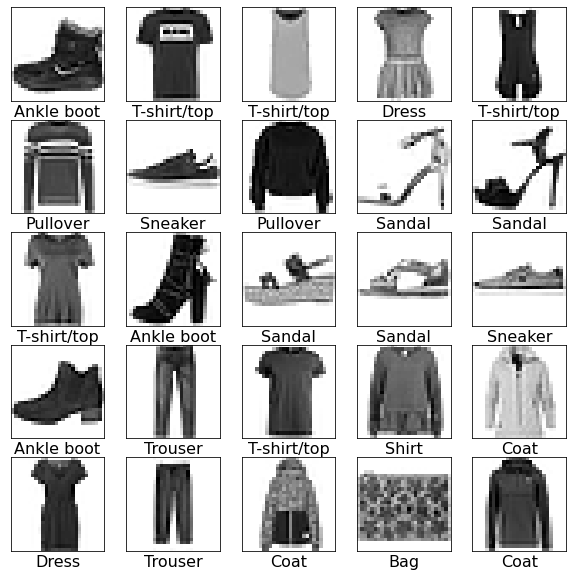

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[y_train[i]])
plt.show()

### Construcción del modelo

In [ ]:
def build_autoencoder(input_shape, representation_size):
    encoder = models.Sequential()
    encoder.add(layers.InputLayer(input_shape=input_shape))
    encoder.add(layers.Flatten())
    encoder.add(layers.Dense(256, activation='relu'))
    encoder.add(layers.Dense(128, activation='relu'))
    encoder.add(layers.Dense(representation_size, activation='relu'))

    decoder = models.Sequential()
    decoder.add(layers.Dense(128, activation='sigmoid'))
    decoder.add(layers.Dense(256, activation='sigmoid'))
    decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
    decoder.add(layers.Reshape(input_shape)) # "Unflatten"

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(encoder)
    model.add(decoder)

    return model, encoder, decoder

In [ ]:
input_shape = x_train.shape[1:]

## Representación de tamaño 16

In [ ]:
model16, encoder, decoder = build_autoencoder(input_shape, 16)

In [ ]:
model16.summary(expand_nested=True)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 16)                235920    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| flatten_6 (Flatten)       (None, 784)               0         |
|                                                               |
| dense_24 (Dense)          (None, 256)               200960    |
|                                                               |
| dense_25 (Dense)          (None, 128)               32896     |
|                                                               |
| dense_26 (Dense)          (None, 16)                2064      |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_19 (Sequential)  (None, 28, 28)            236688    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_27 (Dense)          (None, 128)              

In [ ]:
model16.compile(optimizer='adam', loss='binary_crossentropy')

history16 = model16.fit(x_train, x_train, batch_size=128, epochs=50, shuffle=True, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 5s 12ms/step - loss: 0.3900 - val_loss: 0.3445
Epoch 2/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3280 - val_loss: 0.3205
Epoch 3/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3135 - val_loss: 0.3125
Epoch 4/50
422/422 [==============================] - 5s 12ms/step - loss: 0.3074 - val_loss: 0.3071
Epoch 5/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3028 - val_loss: 0.3033
Epoch 6/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2993 - val_loss: 0.3002
Epoch 7/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2965 - val_loss: 0.2977
Epoch 8/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2941 - val_loss: 0.2955
Epoch 9/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2923 - val_loss: 0.2939
Epoch 10/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2906 - val_lo

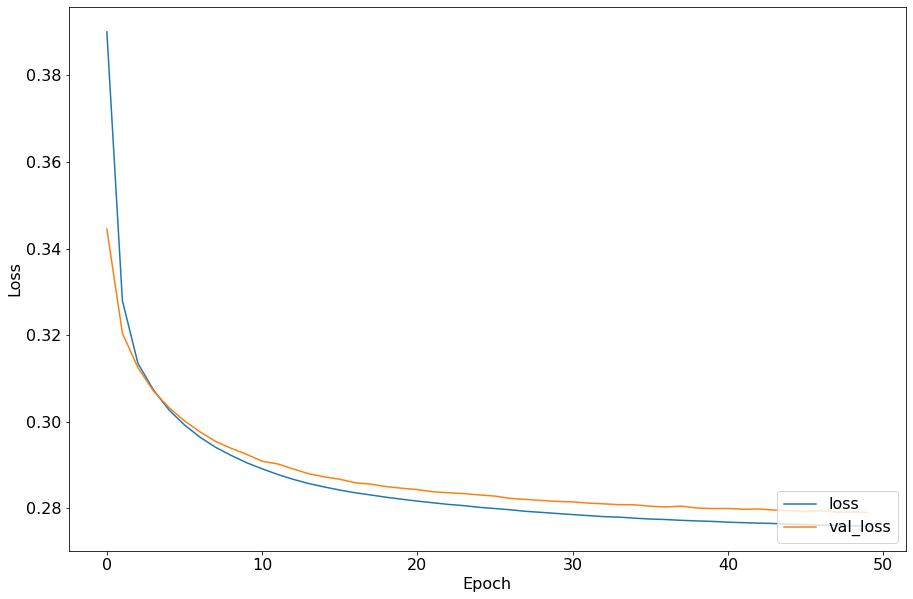

In [ ]:
plt.plot(history16.history['loss'], label='loss')
plt.plot(history16.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
decoded_imgs = model16(x_test[:10])

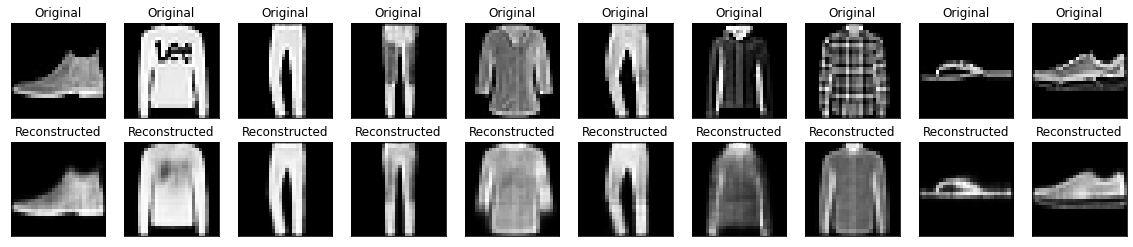

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Representación de tamaño 32

In [ ]:
model32, encoder, decoder = build_autoencoder(input_shape, 32)

In [ ]:
model32.summary(expand_nested=True)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 32)                237984    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| flatten_7 (Flatten)       (None, 784)               0         |
|                                                               |
| dense_30 (Dense)          (None, 256)               200960    |
|                                                               |
| dense_31 (Dense)          (None, 128)               32896     |
|                                                               |
| dense_32 (Dense)          (None, 32)                4128      |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_22 (Sequential)  (None, 28, 28)            238736    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_33 (Dense)          (None, 128)              

In [ ]:
model32.compile(optimizer='adam', loss='binary_crossentropy')

history32 = model32.fit(x_train, x_train, batch_size=128, epochs=50, shuffle=True, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 6s 12ms/step - loss: 0.3946 - val_loss: 0.3433
Epoch 2/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3250 - val_loss: 0.3183
Epoch 3/50
422/422 [==============================] - 5s 12ms/step - loss: 0.3111 - val_loss: 0.3096
Epoch 4/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3046 - val_loss: 0.3046
Epoch 5/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3001 - val_loss: 0.3004
Epoch 6/50
422/422 [==============================] - 5s 11ms/step - loss: 0.2965 - val_loss: 0.2974
Epoch 7/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2938 - val_loss: 0.2950
Epoch 8/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2914 - val_loss: 0.2926
Epoch 9/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2892 - val_loss: 0.2906
Epoch 10/50
422/422 [==============================] - 5s 13ms/step - loss: 0.2873 - val_lo

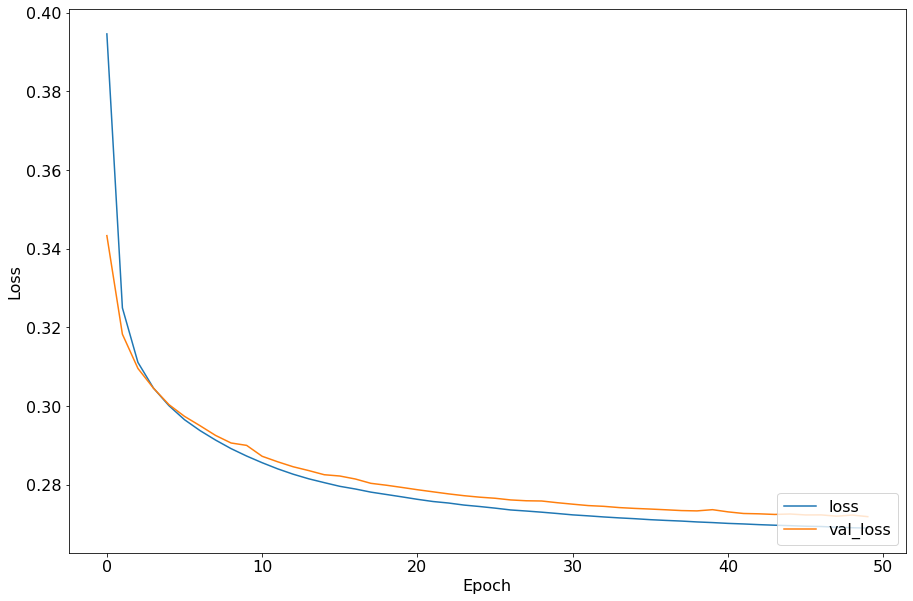

In [ ]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
decoded_imgs = model32(x_test[:10])

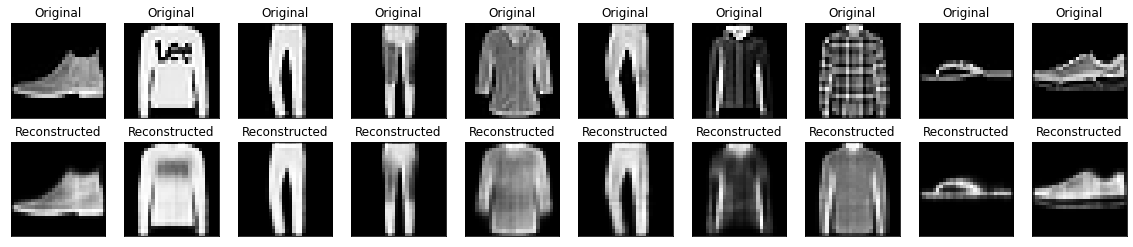

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Representación de tamaño 64

In [ ]:
model64, encoder, decoder = build_autoencoder(input_shape, 64)

In [ ]:
model64.summary(expand_nested=True)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 64)                242112    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| flatten_8 (Flatten)       (None, 784)               0         |
|                                                               |
| dense_36 (Dense)          (None, 256)               200960    |
|                                                               |
| dense_37 (Dense)          (None, 128)               32896     |
|                                                               |
| dense_38 (Dense)          (None, 64)                8256      |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_25 (Sequential)  (None, 28, 28)            242832    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_39 (Dense)          (None, 128)              

In [ ]:
model64.compile(optimizer='adam', loss='binary_crossentropy')

history64 = model64.fit(x_train, x_train, batch_size=128, epochs=50, shuffle=True, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 6s 12ms/step - loss: 0.3929 - val_loss: 0.3462
Epoch 2/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3265 - val_loss: 0.3194
Epoch 3/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3122 - val_loss: 0.3115
Epoch 4/50
422/422 [==============================] - 5s 12ms/step - loss: 0.3054 - val_loss: 0.3055
Epoch 5/50
422/422 [==============================] - 5s 11ms/step - loss: 0.3002 - val_loss: 0.3003
Epoch 6/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2963 - val_loss: 0.2970
Epoch 7/50
422/422 [==============================] - 5s 11ms/step - loss: 0.2934 - val_loss: 0.2946
Epoch 8/50
422/422 [==============================] - 5s 11ms/step - loss: 0.2910 - val_loss: 0.2921
Epoch 9/50
422/422 [==============================] - 5s 11ms/step - loss: 0.2888 - val_loss: 0.2903
Epoch 10/50
422/422 [==============================] - 5s 12ms/step - loss: 0.2870 - val_lo

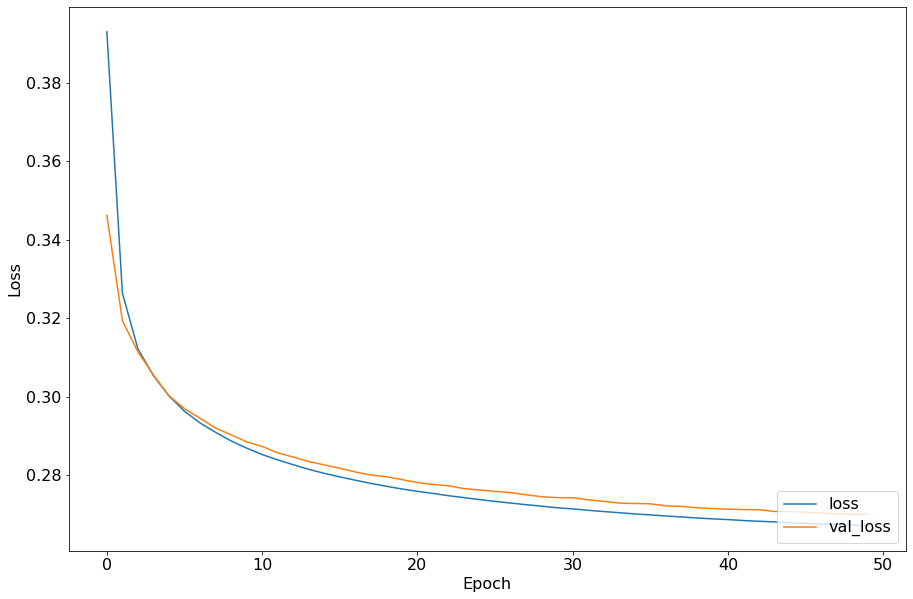

In [ ]:
plt.plot(history64.history['loss'], label='loss')
plt.plot(history64.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
decoded_imgs = model64(x_test[:10])

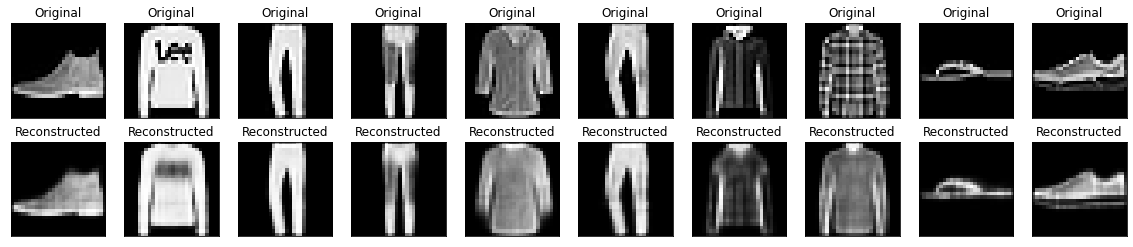

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
train_score16 = model16.evaluate(x_train, x_train, verbose = 0)
test_score16 = model16.evaluate(x_test, x_test, verbose = 0)

train_score32 = model32.evaluate(x_train, x_train, verbose = 0)
test_score32 = model32.evaluate(x_test, x_test, verbose = 0)

train_score64 = model64.evaluate(x_train, x_train, verbose = 0)
test_score64 = model64.evaluate(x_test, x_test, verbose = 0)

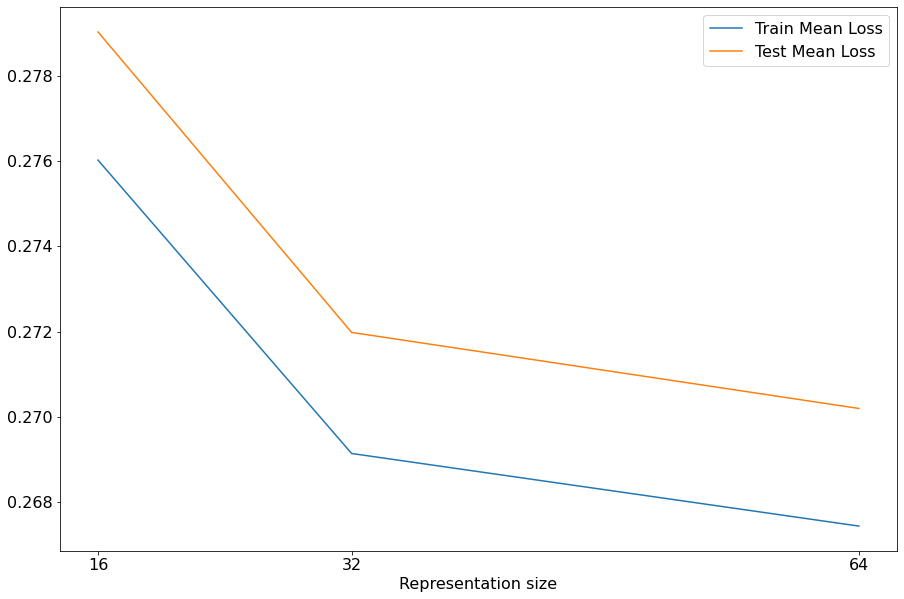

In [ ]:
sizes = [16, 32, 64]
plt.plot(sizes, [train_score16, train_score32, train_score64], label="Train Mean Loss")
plt.plot(sizes, [test_score16, test_score32, test_score64], label="Test Mean Loss")
plt.xlabel("Representation size")
plt.xticks([16, 32, 64])
plt.legend()